In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mdismamhossainredwan","key":"115ac9e3298b228c82bc6a2d06606327"}'}

In [ ]:
#!mkdir -p /root/.kaggle
#!cp /path/to/kaggle.json /root/.kaggle/

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/


In [ ]:
# !mkdir -p ~/.kaggle
# !mv kaggle.json ~/.kaggle/

#! mkdir ~/.kaggle

#! cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d praveen2084/leather-defect-classification

 55% 17.0M/30.7M [00:00<00:00, 87.4MB/s]
100% 30.7M/30.7M [00:00<00:00, 115MB/s] 


In [ ]:
#!kaggle datasets download 'https://www.kaggle.com/datasets/praveen2084/leather-defect-classification'

In [ ]:
import zipfile

# Specify the path to the downloaded ZIP file
zip_file_path = "/content/leather-defect-classification.zip"

# Specify the directory where you want to extract the dataset
extract_to_directory = "/content/Leather detect"

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_directory)

print("Dataset extracted successfully!")

Dataset extracted successfully!


In [ ]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

# Set the path to the directory containing the class folders
data_directory = "/content/Leather detect/Leather Defect Classification"

# Set the path to the directory where you want to create train, test, and validation folders
output_directory = "/content/Leather detect/Train_split_dataset"

# Create train, test, and validation directories
train_dir = os.path.join(output_directory, "train")
test_dir = os.path.join(output_directory, "test")
val_dir = os.path.join(output_directory, "validation")
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Iterate through each class folder in the dataset directory
for class_folder in os.listdir(data_directory):
    class_folder_path = os.path.join(data_directory, class_folder)
    if os.path.isdir(class_folder_path):
        # Get a list of all image filenames in the class folder
        images = [f for f in os.listdir(class_folder_path) if f.endswith('.jpg') or f.endswith('.png')]

        # Split the images into train, test, and validation sets
        train_images, test_val_images = train_test_split(images, test_size=0.2, random_state=42)
        test_images, val_images = train_test_split(test_val_images, test_size=0.5, random_state=42)

        # Move images to the corresponding directories
        for image in train_images:
            src = os.path.join(class_folder_path, image)
            dest = os.path.join(train_dir, class_folder)
            os.makedirs(dest, exist_ok=True)
            shutil.copy(src, dest)

        for image in test_images:
            src = os.path.join(class_folder_path, image)
            dest = os.path.join(test_dir, class_folder)
            os.makedirs(dest, exist_ok=True)
            shutil.copy(src, dest)

        for image in val_images:
            src = os.path.join(class_folder_path, image)
            dest = os.path.join(val_dir, class_folder)
            os.makedirs(dest, exist_ok=True)
            shutil.copy(src, dest)

print("Dataset split into train, test, and validation sets successfully!")


Dataset split into train, test, and validation sets successfully!


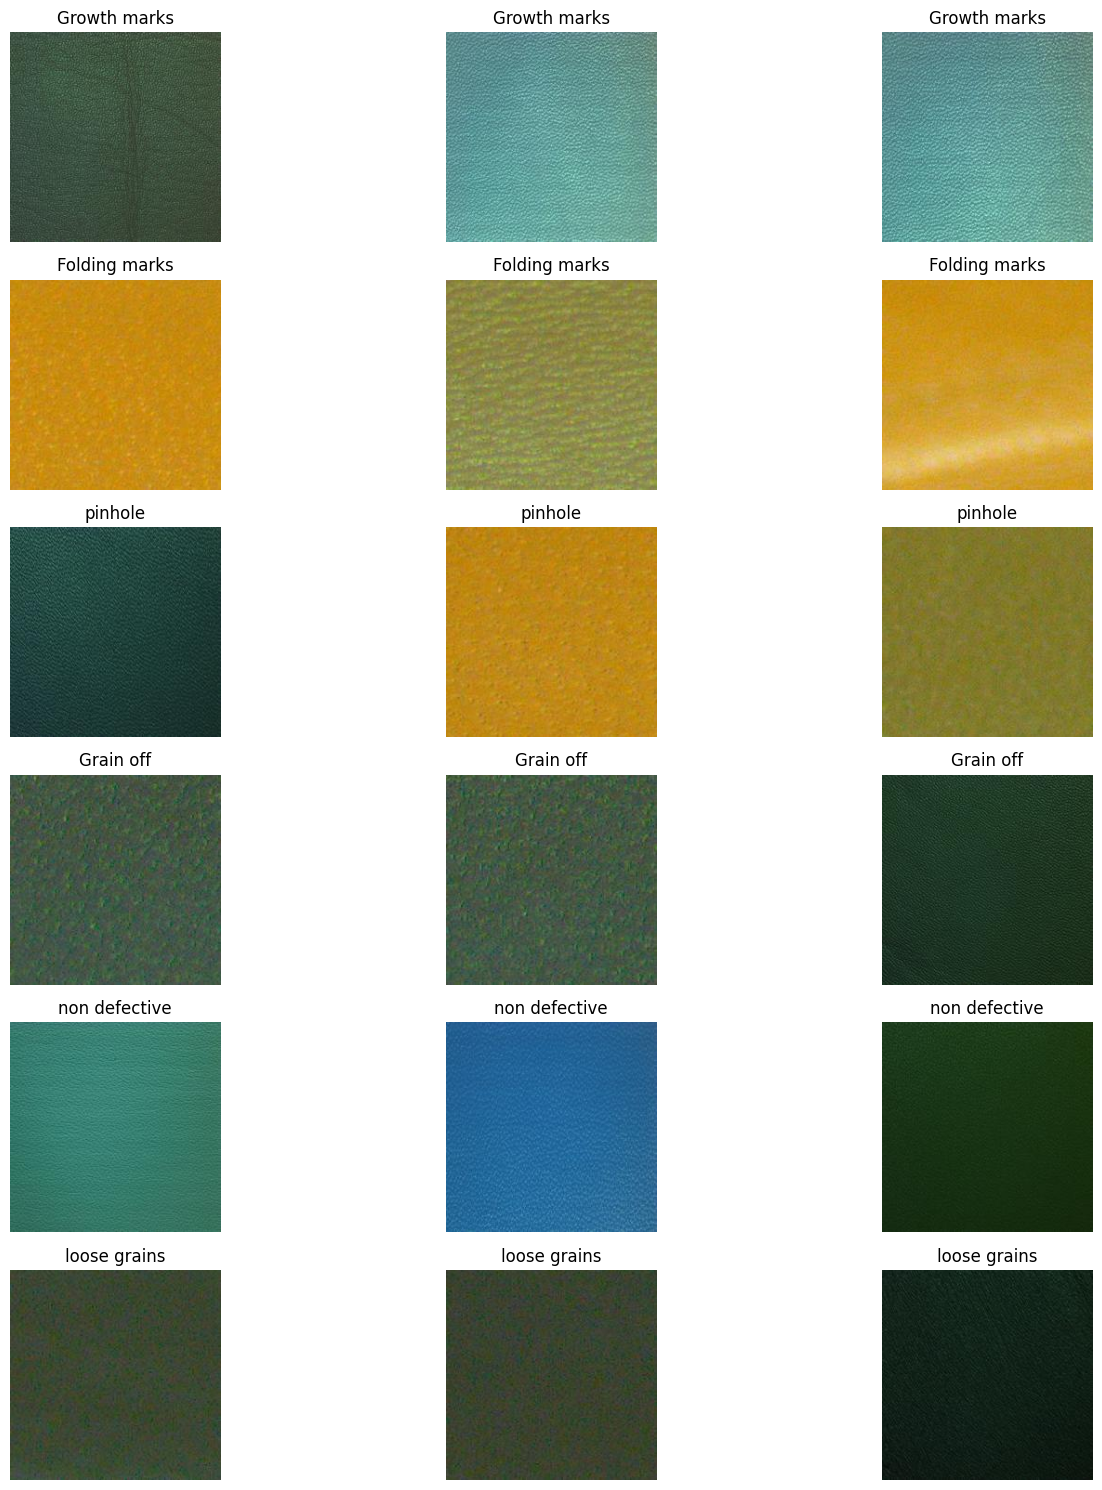

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set the path to the directory containing the training set
train_dir = "/content/Leather detect/Train_split_dataset/train"

# Get a list of class folders in the training directory
class_folders = os.listdir(train_dir)

# Define the number of samples to visualize per class
num_samples_per_class = 3

# Define the size of the figure grid
num_cols = 3
num_rows = len(class_folders)

# Create a figure and axis objects
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Iterate through each class folder
for i, class_folder in enumerate(class_folders):
    # Get a list of image filenames in the class folder
    image_files = os.listdir(os.path.join(train_dir, class_folder))

    # Randomly select num_samples_per_class images from the class folder
    sample_images = random.sample(image_files, num_samples_per_class)

    # Plot each sample image
    for j, image_file in enumerate(sample_images):
        image_path = os.path.join(train_dir, class_folder, image_file)
        ax = axes[i, j]
        ax.imshow(mpimg.imread(image_path))
        ax.axis('off')
        ax.set_title(class_folder)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

gpus= tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)
# Set paths to train, test, and validation directories
train_dir = "/content/Leather detect/Train_split_dataset/train"
test_dir = "/content/Leather detect/Train_split_dataset/test"
val_dir = "/content/Leather detect/Train_split_dataset/validation"

# Define image dimensions and batch size
img_height, img_width = 224, 224
batch_size = 32

# Create data generators for train, test, and validation sets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Define classes you want to include
included_classes = ['pinhole', 'non defective']

# Create data generators for train, test, and validation sets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    classes=included_classes
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    classes=included_classes
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    classes=included_classes
)


# Load MobileNetV2 model without top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Add new top layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Combine base model with new top layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
mobile_net_history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs= 30
)

# Evaluate the model on the test set
test_loss, mobile_net_test_acc = model.evaluate(test_generator, verbose=2)
print("\nTest Accuracy:", mobile_net_test_acc)


Found 960 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/30
30/30 [==============================] - 54s 2s/step - loss: 0.8601 - accuracy: 0.7219 - val_loss: 0.6603 - val_accuracy: 0.7812
Epoch 2/30
30/30 [==============================] - 50s 2s/step - loss: 0.3096 - accuracy: 0.8323 - val_loss: 0.2409 - val_accuracy: 0.8958
Epoch 3/30
30/30 [==============================] - 53s 2s/step - loss: 0.2605 - accuracy: 0.8625 - val_loss: 0.2847 - val_accuracy: 0.8542
Epoch 4/30
30/30 [==============================] - 51s 2s/step - loss: 0.2550 - accuracy: 0.8594 - val_loss: 0.3489 - val_accuracy: 0.8229
Epoch 5/30
30/30 [==============================] - 60s 2s/step - loss: 0.2394 - accuracy: 0.8813 - val_loss: 0.3932 - val_accuracy: 0.8229
Epoch 6/30
30/30 [==============================] - 61s 2s/step - loss: 0.2629 - accuracy: 0.8583 - val_loss: 0.21

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set paths to train, test, and validation directories
train_dir = "/content/Leather detect/Train_split_dataset/train"
test_dir = "/content/Leather detect/Train_split_dataset/test"
val_dir = "/content/Leather detect/Train_split_dataset/validation"

# Define image dimensions and batch size
img_height, img_width = 224, 224
batch_size = 32

# Create data generators for train, test, and validation sets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Define classes you want to include
included_classes = ['pinhole', 'non defective']

# Create data generators for train, test, and validation sets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    classes=included_classes
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    classes=included_classes
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    classes=included_classes
)

# Load VGG16 model without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Add new top layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Combine base model with new top layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
vgg16_history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=30
)

# Evaluate the model on the test set
test_loss, vgg16_test_acc = model.evaluate(test_generator, verbose=2)
print("\nTest Accuracy:", vgg16_test_acc)


Found 960 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/30
30/30 [==============================] - 577s 19s/step - loss: 0.6392 - accuracy: 0.6635 - val_loss: 0.5611 - val_accuracy: 0.7500
Epoch 2/30
30/30 [==============================] - 576s 19s/step - loss: 0.5148 - accuracy: 0.7531 - val_loss: 0.4841 - val_accuracy: 0.7396
Epoch 3/30
30/30 [==============================] - 576s 19s/step - loss: 0.4469 - accuracy: 0.7906 - val_loss: 0.4629 - val_accuracy: 0.7500
Epoch 4/30
30/30 [==============================] - 561s 19s/step - loss: 0.4115 - accuracy: 0.8031 - val_loss: 0.3671 - val_accuracy: 0.7812
Epoch 5/30
30/30 [==============================] - 574s 19s/step - loss: 0.3790 - accuracy: 0.8062 - val_loss: 0.4077 - val_accuracy: 0.8021
Epoch 6/30
30/30 [==============================] - 575s 19s/step - loss: 0.3627 - accuracy: 0.8083 - 

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set paths to train, test, and validation directories
train_dir = "/content/Leather detect/Train_split_dataset/train"
test_dir = "/content/Leather detect/Train_split_dataset/test"
val_dir = "/content/Leather detect/Train_split_dataset/validation"

# Define image dimensions and batch size
img_height, img_width = 224, 224
batch_size = 32

# Create data generators for train, test, and validation sets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Define classes you want to include
included_classes = ['pinhole', 'non defective']

# Create data generators for train, test, and validation sets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    classes=included_classes
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    classes=included_classes
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    classes=included_classes
)

# Load ResNet50 model without top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Add new top layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Combine base model with new top layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
resnet50_history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=30
)

# Evaluate the model on the test set
test_loss, resnet50_test_acc = model.evaluate(test_generator, verbose=2)
print("\nTest Accuracy:", resnet50_test_acc)


Found 960 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
Found 120 images belonging to 2 classes.
94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/30
30/30 [==============================] - 207s 6s/step - loss: 0.9854 - accuracy: 0.5167 - val_loss: 0.7645 - val_accuracy: 0.4688
Epoch 2/30
30/30 [==============================] - 192s 6s/step - loss: 0.7283 - accuracy: 0.5094 - val_loss: 0.6931 - val_accuracy: 0.4792
Epoch 3/30
30/30 [==============================] - 187s 6s/step - loss: 0.7054 - accuracy: 0.5437 - val_loss: 0.6807 - val_accuracy: 0.7083
Epoch 4/30
30/30 [==============================] - 184s 6s/step - loss: 0.6841 - accuracy: 0.5719 - val_loss: 0.6708 - val_accuracy: 0.5104
Epoch 5/30
30/30 [==============================] - 188s 6s/step - loss: 0.7171 - accuracy: 0.5479 - val_loss: 0.6847 - val_accuracy: 0.5104
Epoch 6/30
30/30 [==============================] - 189s 6s/step - loss: 0.6904 - accuracy: 0.5573 - val_lo

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set paths to train, test, and validation directories
train_dir = "/content/Leather detect/Train_split_dataset/train"
test_dir = "/content/Leather detect/Train_split_dataset/test"
val_dir = "/content/Leather detect/Train_split_dataset/validation"

# Define image dimensions and batch size
img_height, img_width = 224, 224
batch_size = 32

# Create data generators for train, test, and validation sets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators for train, test, and validation sets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

# Load InceptionV3 model without top layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Add new top layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Combine base model with new top layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
inception_v3_history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=30
)

# Evaluate the model on the test set
test_loss, inception_v3_test_acc = model.evaluate(test_generator, verbose=2)
print("\nTest Accuracy:", inception_v3_test_acc)


Found 2880 images belonging to 6 classes.
Found 360 images belonging to 6 classes.
Found 360 images belonging to 6 classes.
87910968/87910968 [==============================] - 1s 0us/step
Epoch 1/30
90/90 [==============================] - 360s 4s/step - loss: 1.3392 - accuracy: 0.5038 - val_loss: 1.0117 - val_accuracy: 0.5653
Epoch 2/30
90/90 [==============================] - 360s 4s/step - loss: 0.9346 - accuracy: 0.6073 - val_loss: 0.9278 - val_accuracy: 0.6051
Epoch 3/30
90/90 [==============================] - 359s 4s/step - loss: 0.8382 - accuracy: 0.6503 - val_loss: 0.9359 - val_accuracy: 0.5966
Epoch 4/30
90/90 [==============================] - 350s 4s/step - loss: 0.7753 - accuracy: 0.6830 - val_loss: 0.8115 - val_accuracy: 0.6705
Epoch 5/30
90/90 [==============================] - 358s 4s/step - loss: 0.7333 - accuracy: 0.6910 - val_loss: 0.7586 - val_accuracy: 0.6847
Epoch 6/30
90/90 [==============================] - 355s 4s/step - loss: 0.7128 - accuracy: 0.7010 - val_l

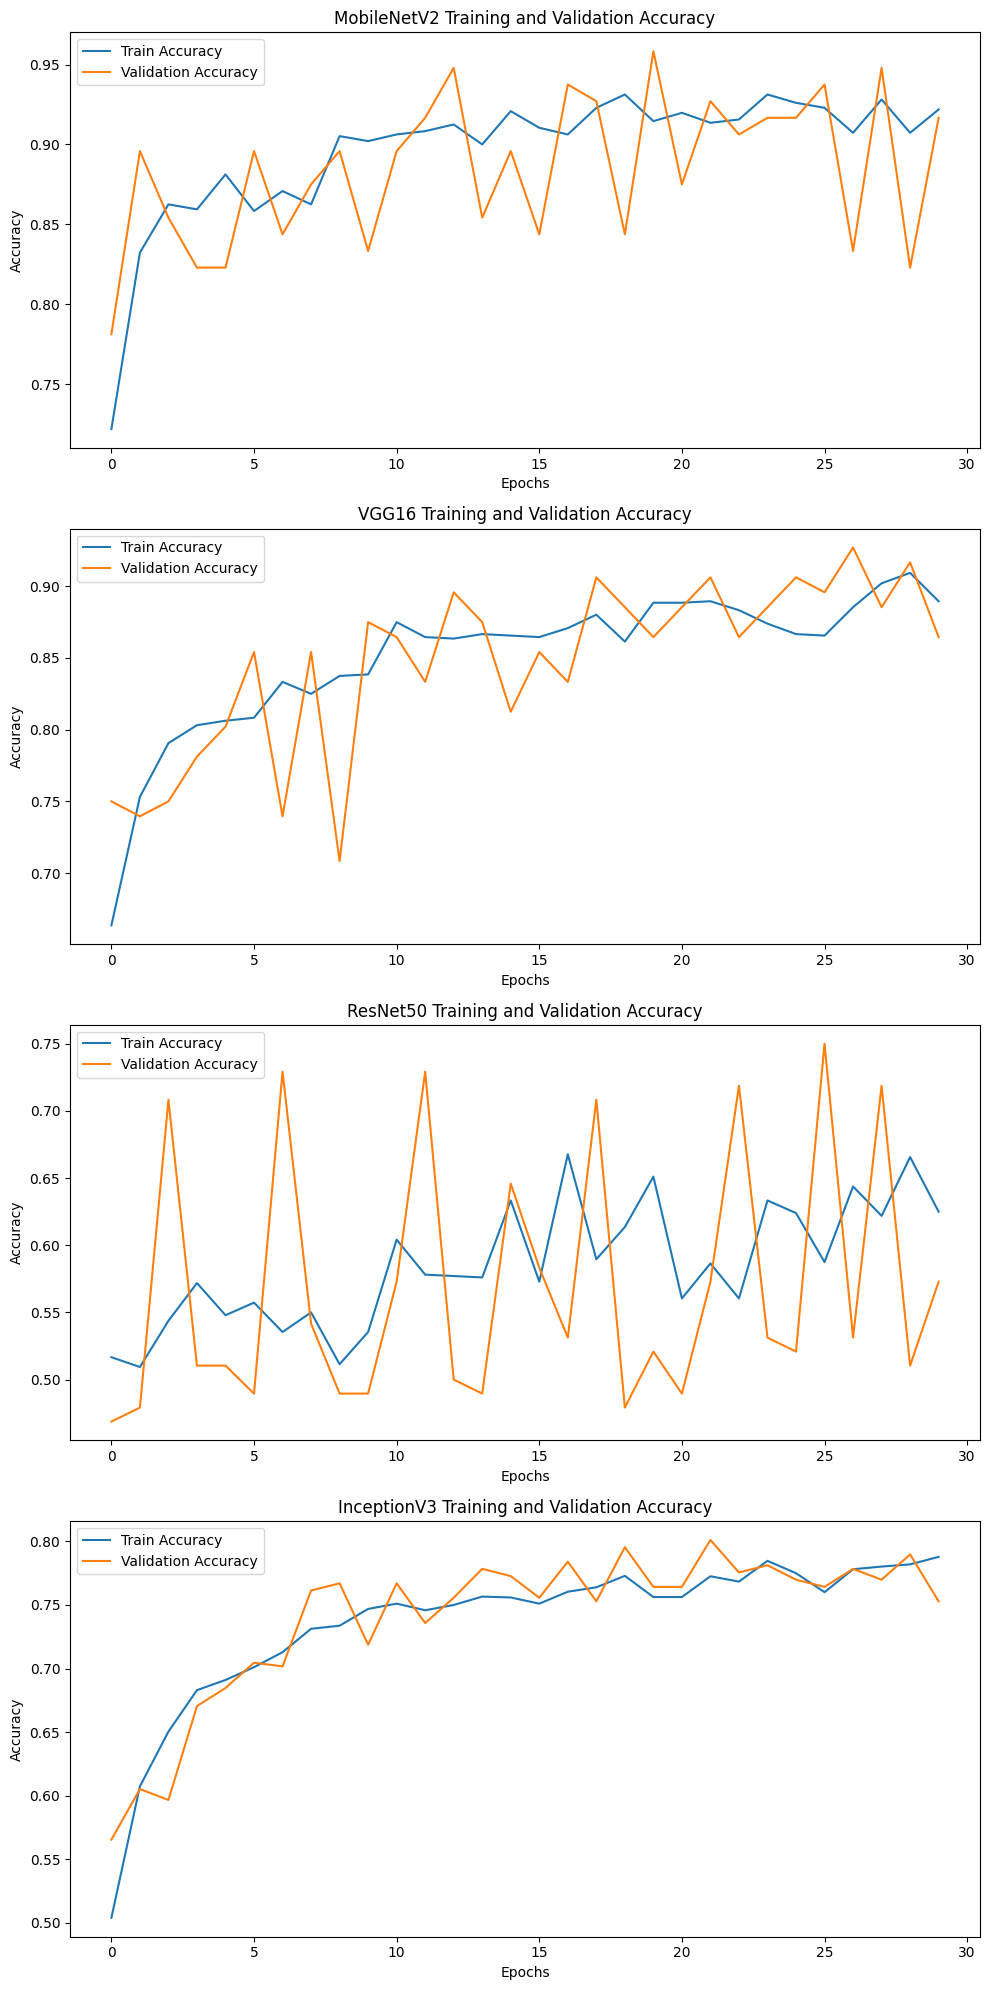

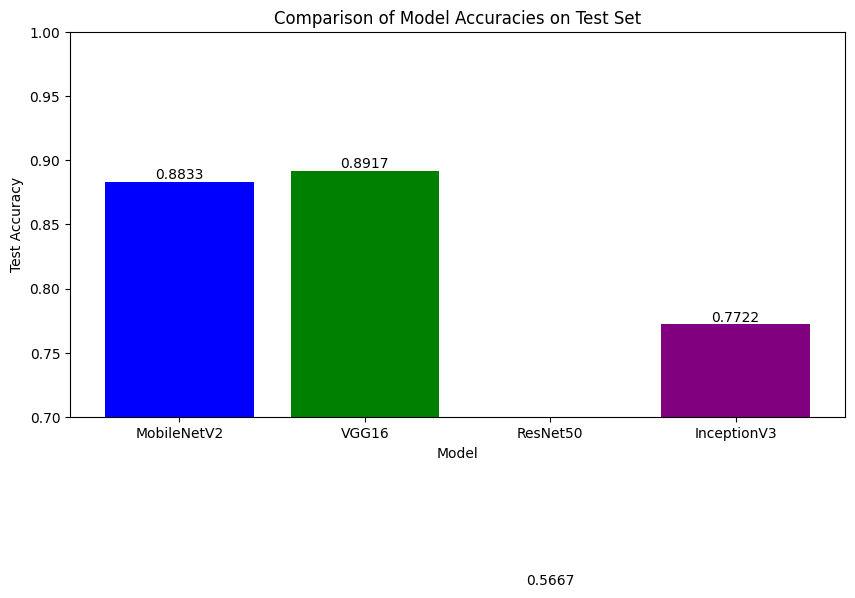

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

histories = {
    'MobileNetV2': mobile_net_history,
    'VGG16': vgg16_history,
    'ResNet50': resnet50_history,
    'InceptionV3': inception_v3_history
}

test_accuracies = {
    'MobileNetV2': mobile_net_test_acc,
    'VGG16': vgg16_test_acc,
    'ResNet50': resnet50_test_acc,
    'InceptionV3': inception_v3_test_acc
}

#Plotting training and validation accuracy for each model
fig, ax = plt.subplots(len(histories), 1, figsize=(10, 20))
for i, (model_name, history) in enumerate(histories.items()):
    ax[i].plot(history.history['accuracy'], label='Train Accuracy')
    ax[i].plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax[i].set_title(f'{model_name} Training and Validation Accuracy')
    ax[i].set_xlabel('Epochs')
    ax[i].set_ylabel('Accuracy')
    ax[i].legend()

plt.tight_layout()
plt.show()

#Bar chart of test accuracies
names = list(test_accuracies.keys())
values = list(test_accuracies.values())

plt.figure(figsize=(10, 5))
bars = plt.bar(names, values, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Model Accuracies on Test Set')
plt.ylim([0.7, 1.0])  # Assuming accuracy ranges between 70% and 100%

#Adding text labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

plt.show()